<a href="https://colab.research.google.com/github/SaiDeepika2004/CODSOFT/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement


The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

Objective:

The objective of this project is to develop a machine learning model capable of learning from the measurements of iris flowers and accurately classifying them into their respective species. The model's primary goal is to automate the classification process based on the distinct characteristics of each iris species.

Project Details:

Iris Species: The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.
Key Measurements: The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.
Machine Learning Model: The project involves the creation and training of a machine learning model to accurately classify iris flowers based on their measurements.
This project's significance lies in its potential to streamline and automate the classification of iris species, which can have broader applications in botany, horticulture, and environmental monitoring.

## Let's Dive into our code !

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### DataSet Loading

In [2]:
# Load Dataset
df = pd.read_csv("IRIS.csv")

#### DataSet Rows & Columns


In [3]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [4]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Duplicate Values

In [7]:
df = df.drop_duplicates()

In [8]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


Missing Values / Null values

In [6]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


## The Dataset Variables

In [9]:
# Dataset Columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [16]:
data = df

In [17]:
# New updated dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


chart 1 - Distribution of values

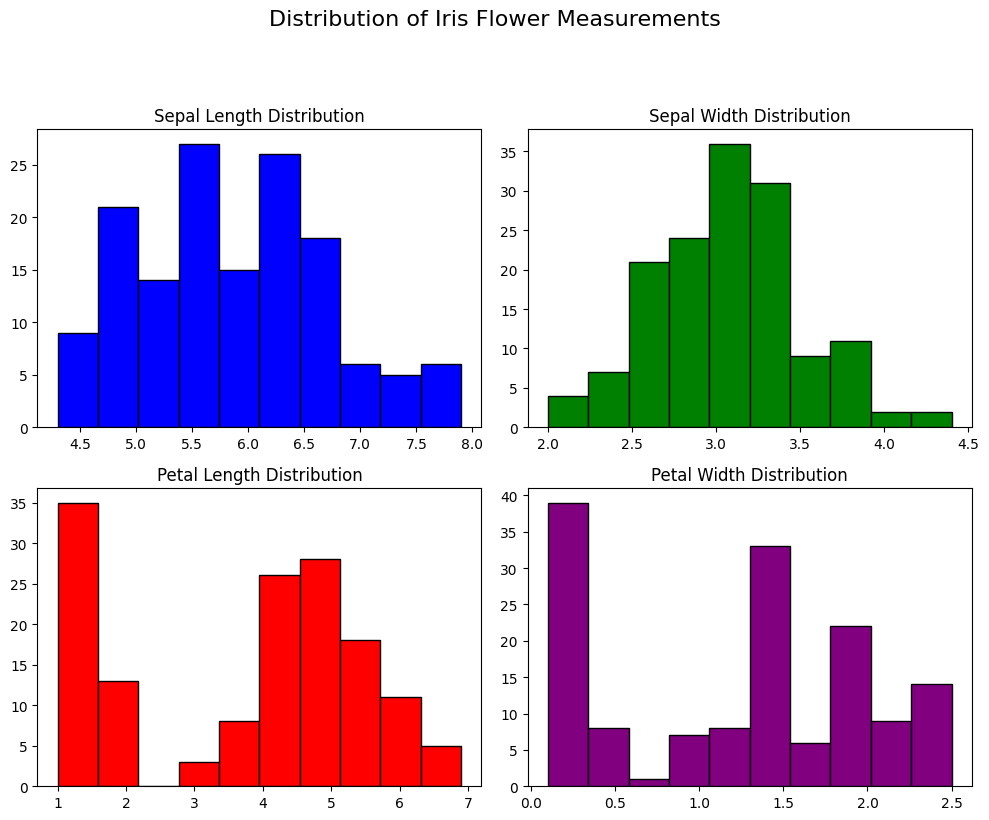

In [18]:
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(10, 8))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=16, y=1.02)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['sepal_length'], bins=10, color='blue', edgecolor='black')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['sepal_width'], bins=10, color='green', edgecolor='black')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['petal_length'], bins=10, color='red', edgecolor='black')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['petal_width'], bins=10, color='purple', edgecolor='black')
plt.title('Petal Width Distribution')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle

# Display the subplots
plt.show()


In [19]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Correlation Heatmap

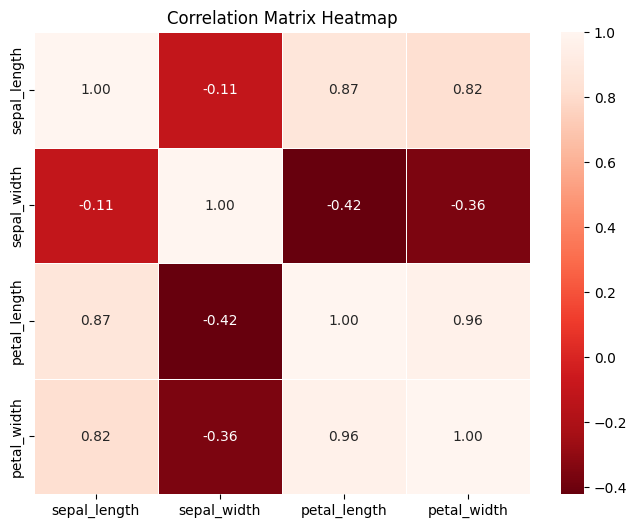

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix excluding non-numeric columns like 'Species'
corr_matrix = data.drop(columns='species').corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Display the chart
plt.show()


Chart - Sepal width vs Petal width

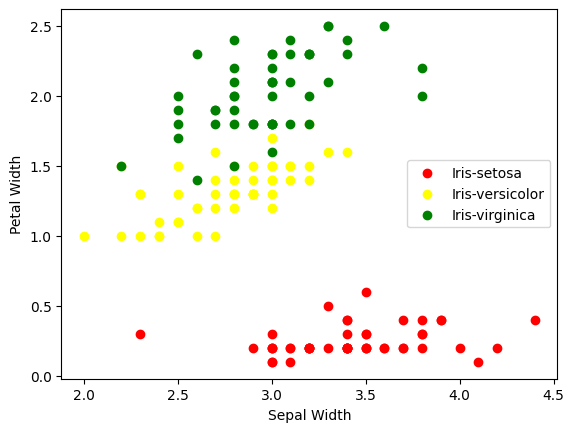

In [29]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

Chart - Sepal length vs Petal Length

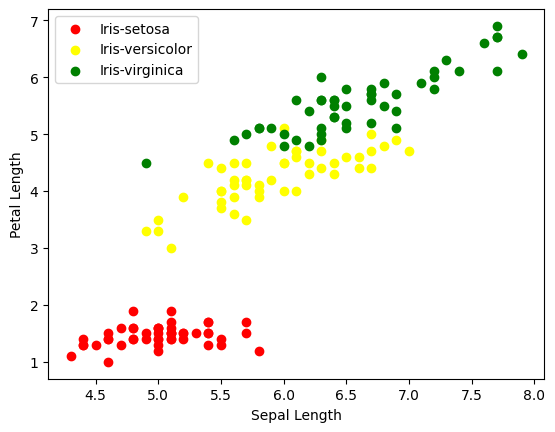

In [31]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Categorical Encoding

In [32]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'species' column to convert the species names to numerical labels
data['species'] = le.fit_transform(data['species'])

# Check the unique values in the 'species' column after encoding
unique_species = data['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [33]:
# Defining the X and y
x=data.drop(columns=['species'], axis=1)
y=data['species']

In [34]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [35]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
species,
2,38
0,32
1,32


#### ML Model Implementation

In [36]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [37]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [38]:
print(score)

Empty DataFrame
Columns: []
Index: [Precision Train, Precision Test, Recall Train, Recall Test, Accuracy Train, Accuracy Test, F1 macro Train, F1 macro Test]


Random Forest Model

In [39]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


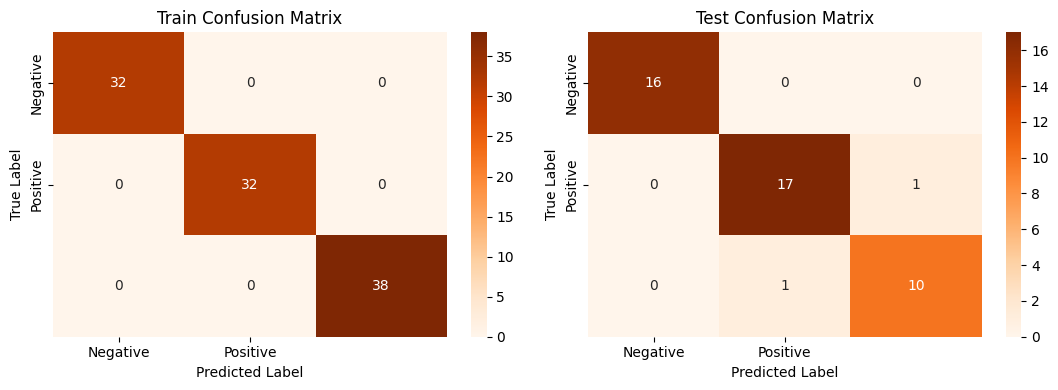


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        32 |
| 1            |           1 |        1 |          1 |        32 |
| 2            |           1 |        1 |          1 |        38 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.944444 | 0.944444 |   0.944444 | 18        |
| 2            |    0.909091 | 0.909091 |   0.909091 | 11        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [40]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [41]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Random Forest
Precision Train,1.000000
Precision Test,0.955556
Recall Train,1.000000
Recall Test,0.955556
Accuracy Train,1.000000
Accuracy Test,0.955556
F1 macro Train,1.000000
F1 macro Test,0.955556


Cross Validation and Hyper Parameter Tuning

In [42]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 13}


In [43]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


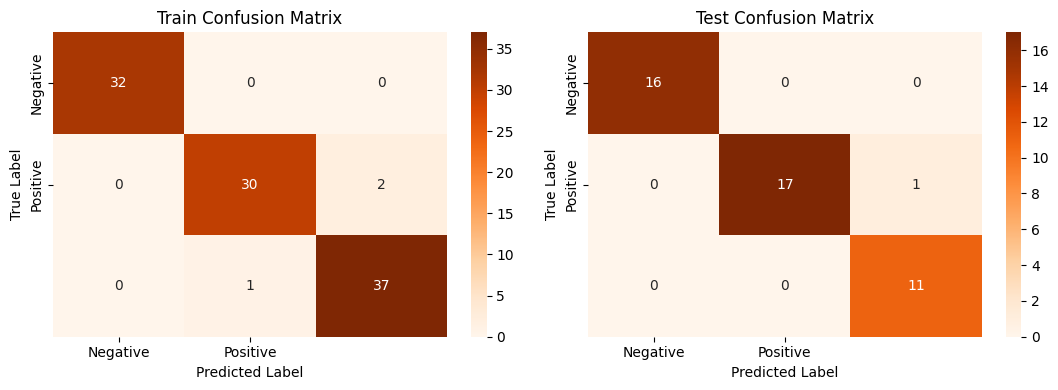


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    0.967742 | 0.9375   |   0.952381 |  32        |
| 2            |    0.948718 | 0.973684 |   0.961039 |  38        |
| accuracy     |    0.970588 | 0.970588 |   0.970588 |   0.970588 |
| macro avg    |    0.972153 | 0.970395 |   0.97114  | 102        |
| weighted avg |    0.970775 | 0.970588 |   0.970546 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.916667 | 1        |   0.956522 | 11        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [44]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [45]:
score['Random Forest tuned'] = rf2_score

In [46]:
# Updated Evaluation metric Score Chart
score

,Random Forest,Random Forest tuned
Precision Train,1.000000,0.970775
Precision Test,0.955556,0.979630
Recall Train,1.000000,0.970588
Recall Test,0.955556,0.977778
Accuracy Train,1.000000,0.970588
Accuracy Test,0.955556,0.977778
F1 macro Train,1.000000,0.970546
F1 macro Test,0.955556,0.977943


### Conclusion

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

6. **Practical Application:** The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.